In [1]:
from pathlib import Path
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
%matplotlib inline
import emoji
import seaborn as sns
import re
import matplotlib.font_manager as fm
import numpy as np
sns.set_theme(style = 'whitegrid')

fpath = 'TwitterColorEmoji-SVGinOT.ttf'
fprop = fm.FontProperties(fname=fpath)

OUTPUT = Path.cwd().parents[0] / "Output"
df = pd.read_csv(Path.cwd().parents[0]  / "CSV" / "Raw"/ "all_tweets.csv")

#clean data

def clean_emoji(x):
    if x == '{}':
        return None
    else:
        return x[1:-1]

df['emoji'] = df['emoji'].apply(clean_emoji)
df['hashtags'] = df['hashtags'].apply(lambda x:x[1:-1])
df['post_publish_date'] = pd.to_datetime(df['post_publish_date']) 
df['Month/Year'] = df['post_publish_date'].dt.to_period('M')
df['Year'] = df['post_publish_date'].dt.year
df

/home/sagnik/miniconda3/envs/workshop_env/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


,long,lat,post_guid,post_body,post_publish_date,post_language,hashtags,emoji
0,9.159337,45.461345,821687743382167552,L’esercito silenzioso delle #donne #migranti h...,2017-01-18 11:56:38,it,"migranti,donne",None
1,12.545146,41.898417,821691034749009921,".@lauraravetto: #Migranti, “Che dice Minniti s...",2017-01-18 12:09:43,it,Migranti,None
2,-8.621914,41.162142,821690229597868032,#refugeecrisis https://t.co/JQoSFvMTbl,2017-01-18 12:06:31,und,refugeecrisis,None
3,12.545146,41.898417,821690521940881409,".@lauraravetto : #Migranti, “Che dice Minniti ...",2017-01-18 12:07:41,it,Migranti,None
4,-2.115866,53.073712,821693014267559936,""".@theresa_may: '""We can still have EU workers...",2017-01-18 12:17:35,en,"Brexit,PMQs,immigration",None
...,...,...,...,...,...,...,...,...
168248,4.476774,50.501174,821674745691246593,""". @JunckerEU '""We want to get rid of this id...",2017-01-18 11:05:00,en,"terrorism,Juncker,migration",None
168249,14.380054,35.934249,821679100721065989,Malts should not be allowed to deal with #migr...,2017-01-18 11:22:18,en,"EU2017MT,migration",None
168250,-3.703508,40.477795,821677990581043201,#RussianDissident Artist Will Seek #Asylum in ...,2017-01-18 11:17:53,en,"RussianDissident,Asylum",🇫🇷
168251,1.357922,51.379483,821681076779229186,Just caught this sight out of my bedroom windo...,2017-01-18 11:30:09,en,"Victory,Birds,Gaggle,VFlight,Margate,Geese,Mig...",😊


In [2]:
df = df.dropna(axis = 0, how ='any',subset=['emoji'])

In [3]:
df['emoji'].value_counts()

❤️       311
😂        302
🤔        239
🙏        162
😡        160
        ... 
💔,😿        1
😡,☮        1
🤝,🔴,👉      1
👏,😍        1
‼️,😁       1
Name: emoji, Length: 3486, dtype: int64

In [4]:
df['decoded_emoji'] = df['emoji'].apply(emoji.demojize).apply(pd.Series)
df.drop(columns = ['post_guid','post_body'],inplace =True)
df

<ipython-input-4-b7b08711c199>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['decoded_emoji'] = df['emoji'].apply(emoji.demojize).apply(pd.Series)
/home/sagnik/miniconda3/envs/workshop_env/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,long,lat,post_publish_date,post_language,hashtags,emoji,decoded_emoji
46,-3.703508,40.477795,2017-01-18 15:03:03,es,"Refugee,Madrid,RefugeesWelcome",👏,:clapping_hands:
76,26.561192,39.104400,2017-01-18 18:59:12,es,"Lesbos,Lesvos,Photographer,mitilene,photograph...","💙,🇬🇷",":blue_heart:,:Greece:"
85,4.643011,52.383790,2017-01-18 20:07:35,nl,"pensioentje,migranten,AOW",😡,:pouting_face:
97,26.561192,39.104400,2017-01-18 21:54:20,es,"Lesbos,Lesvos,Port,Mitilene,greece,Mitilini,Gr...","💙,🇬🇷",":blue_heart:,:Greece:"
99,26.561192,39.104400,2017-01-18 22:19:20,es,"Lesbos,Lesvos,Mitilene,greece,port,Mitilini,Gr...","💙,🇬🇷",":blue_heart:,:Greece:"
...,...,...,...,...,...,...,...
168189,-0.018734,51.599255,2017-01-18 01:41:44,en,"DieWelt,Migrants","🇬🇧,🥊,😂",":United_Kingdom:,:boxing_glove:,:face_with_tea..."
168202,8.024844,50.881366,2017-01-18 07:52:35,de,"Migration,FoKoS,Fußball",⚽️,:soccer_ball:
168247,8.806506,45.831373,2017-01-18 11:04:04,it,"terremoto,immigrati",😠,:angry_face:
168250,-3.703508,40.477795,2017-01-18 11:17:53,en,"RussianDissident,Asylum",🇫🇷,:France:


In [5]:
def count(x,y):
    return len(x.split(',')),len(y.split(','))


df[['hashtag_count','emoji_count']] = df.apply(lambda x: count(x['hashtags'],
                                                               x['decoded_emoji']),
                                              axis=1).apply(pd.Series)
df

/home/sagnik/miniconda3/envs/workshop_env/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,long,lat,post_publish_date,post_language,hashtags,emoji,decoded_emoji,hashtag_count,emoji_count
46,-3.703508,40.477795,2017-01-18 15:03:03,es,"Refugee,Madrid,RefugeesWelcome",👏,:clapping_hands:,3,1
76,26.561192,39.104400,2017-01-18 18:59:12,es,"Lesbos,Lesvos,Photographer,mitilene,photograph...","💙,🇬🇷",":blue_heart:,:Greece:",7,2
85,4.643011,52.383790,2017-01-18 20:07:35,nl,"pensioentje,migranten,AOW",😡,:pouting_face:,3,1
97,26.561192,39.104400,2017-01-18 21:54:20,es,"Lesbos,Lesvos,Port,Mitilene,greece,Mitilini,Gr...","💙,🇬🇷",":blue_heart:,:Greece:",7,2
99,26.561192,39.104400,2017-01-18 22:19:20,es,"Lesbos,Lesvos,Mitilene,greece,port,Mitilini,Gr...","💙,🇬🇷",":blue_heart:,:Greece:",7,2
...,...,...,...,...,...,...,...,...,...
168189,-0.018734,51.599255,2017-01-18 01:41:44,en,"DieWelt,Migrants","🇬🇧,🥊,😂",":United_Kingdom:,:boxing_glove:,:face_with_tea...",2,3
168202,8.024844,50.881366,2017-01-18 07:52:35,de,"Migration,FoKoS,Fußball",⚽️,:soccer_ball:,3,1
168247,8.806506,45.831373,2017-01-18 11:04:04,it,"terremoto,immigrati",😠,:angry_face:,2,1
168250,-3.703508,40.477795,2017-01-18 11:17:53,en,"RussianDissident,Asylum",🇫🇷,:France:,2,1


In [6]:
df['emoji_count'].value_counts()

1     8488
2     2230
3      855
4      271
5      138
6       55
7       46
8       18
9        8
12       4
10       3
18       1
11       1
37       1
Name: emoji_count, dtype: int64

In [71]:
from collections import Counter
results = Counter()
df['hashtags'].str.lower().str.split(',').apply(results.update)
results.most_common(30)


<ipython-input-71-d9fea3e20a43>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['post_publish_date'] =pd.to_datetime(df['post_publish_date'])
<ipython-input-71-d9fea3e20a43>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['post_publish_date'].dt.year


/home/sagnik/miniconda3/envs/workshop_env/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
/home/sagnik/miniconda3/envs/workshop_env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 108 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/sagnik/miniconda3/envs/workshop_env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 112 missing from current font.
  font.set_text(s, 0.0, flags=flags)


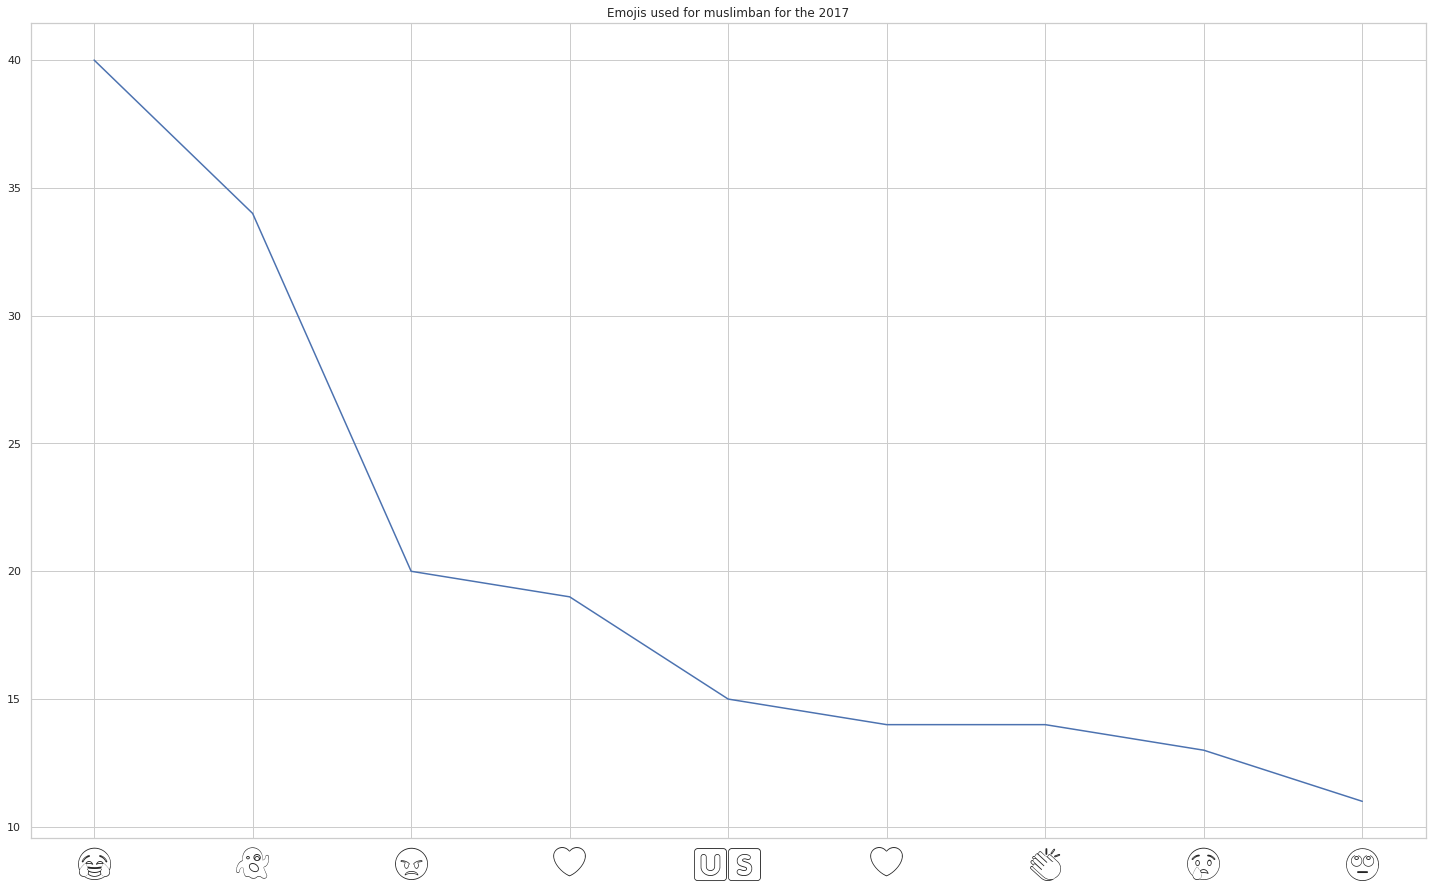

In [131]:


def plot_emoji(year,tag):

    df_plot = df[df["hashtags"].str.contains(f"^({tag})$|^(.*),({tag})$|^(.*),({tag}),(.*)$|^({tag}),(.*)$",
                                                    flags=re.IGNORECASE
                                                    ,regex =True)]

    df_plot = df_plot[df_plot["Year"]== year] 
    emoji_plot = df_plot['emoji'].value_counts()

    
    #locs = np.linspace(0,4,11)
    
    labels = emoji_plot.index.to_list()[:11]
     
    fig,ax = plt.subplots(1,figsize = (25,15))
    
    emoji_plot.head(9).plot(ax=ax)
    
    ax.set(title = f"Emojis used for {tag} for the {year}")
    #ax.set_xticks(locs)
    ax.set_xticklabels(labels,rotation=0, fontsize=35, fontproperties=fprop)
    
plot_emoji(2017,'muslimban')    
    

In [156]:
df['emoji'].value_counts()

❤️              311
😂               302
🤔               239
🙏               162
😡               160
               ... 
🌎,✊🏿,✊🏻,✊🏽,❤      1
🙉,😷,🙈             1
😥,😂               1
💪🏿                1
🙅‍♂️              1
Name: emoji, Length: 3486, dtype: int64

In [157]:
df['post_language'].value_counts()

en     5213
fr     1543
de     1427
it     1123
es      946
und     929
nl      411
tr       91
sv       53
ar       45
pt       34
el       29
in       28
ca       24
da       23
pl       22
no       21
lt       16
cy       15
ht       14
fi       14
cs       12
tl       10
et       10
eu       10
bg        9
sl        9
fa        8
hu        7
ro        5
ja        5
lv        3
is        3
hi        2
ur        2
ru        2
sr        1
Name: post_language, dtype: int64

<ipython-input-153-045b87003612>:6: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  plt.savefig(OUTPUT / "Hashtags vs Emoji.jpeg",quality =95,bbox_inches = 'tight')


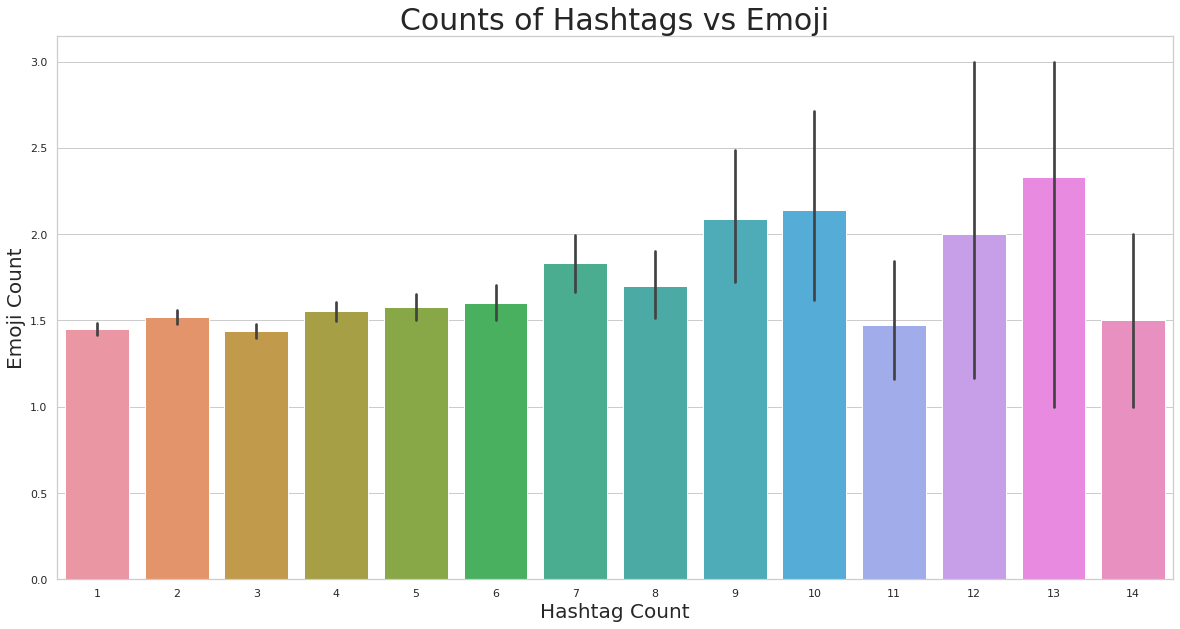

In [153]:
plt.rcParams["axes.labelsize"] = 20
fig, ax = plt.subplots(1,figsize=(20,10))
sns.barplot(data = df, y ='emoji_count',x = 'hashtag_count',ax = ax)
ax.set(xlabel='Hashtag Count',ylabel = 'Emoji Count')
ax.set_title("Counts of Hashtags vs Emoji",fontsize = 30)
plt.savefig(OUTPUT / "Hashtags vs Emoji.jpeg",quality =95,bbox_inches = 'tight')

In [98]:
df['Day/Month/Year'] = df['post_publish_date'].apply(lambda x: x.strftime('%Y-%m-%d'))\
                                              .apply(pd.to_datetime)  

df.drop(columns=['post_publish_date','Date'],inplace =True)
df

<AxesSubplot:xlabel='Day/Month/Year', ylabel='emoji_count'>

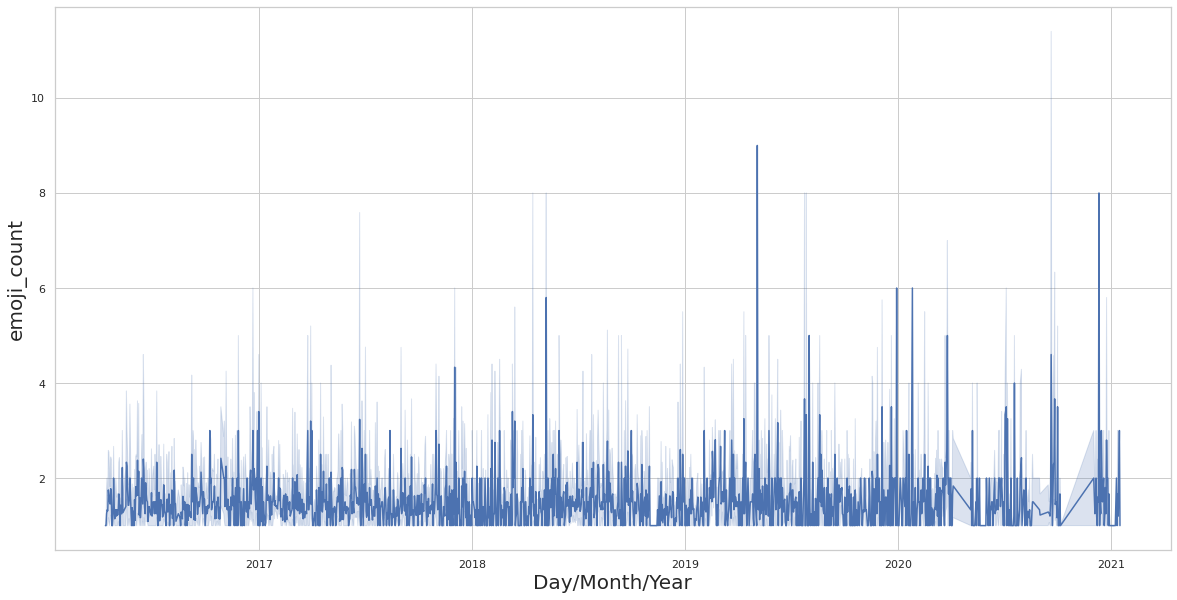

In [102]:
fig, ax = plt.subplots(1,figsize=(20,10))
sns.lineplot(data = df, y ='emoji_count',x = 'Day/Month/Year', ax = ax)

<AxesSubplot:xlabel='Day/Month/Year', ylabel='hashtag_norm'>

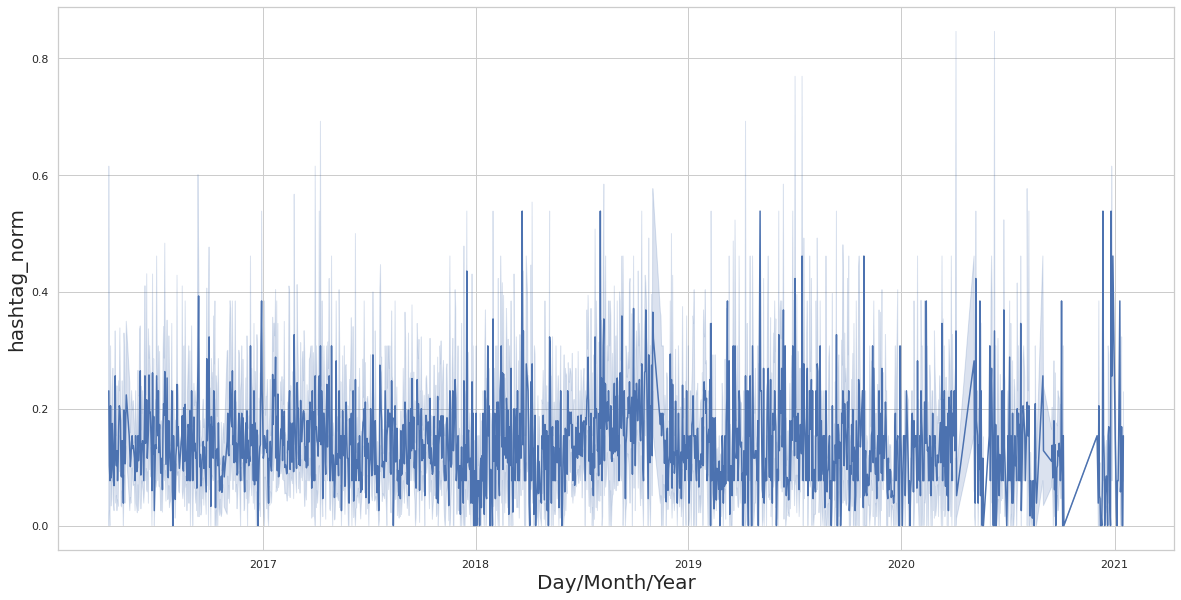

In [108]:
fig, ax = plt.subplots(1,figsize=(20,10))
sns.lineplot(data = df, y ='hashtag_norm',x = 'Day/Month/Year', ax = ax)

In [121]:
a, b = 0, 1
x, y = df.post_count.min(), df.post_count.max()
df['post_norm'] = (df.post_count - x) / (y - x) * (b - a) + a

df

<ipython-input-121-158dcc9f84e9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['post_norm'] = (df.post_count - x) / (y - x) * (b - a) + a


,long,lat,post_language,hashtags,emoji,decoded_emoji,hashtag_count,emoji_count,Day/Month/Year,emoji_norm,hashtag_norm,post_count,post_norm
46,-3.703508,40.477795,es,"Refugee,Madrid,RefugeesWelcome",👏,:clapping_hands:,3,1,2017-01-18,0.000000,0.153846,11,0.036232
76,26.561192,39.104400,es,"Lesbos,Lesvos,Photographer,mitilene,photograph...","💙,🇬🇷",":blue_heart:,:Greece:",7,2,2017-01-18,0.027778,0.461538,11,0.036232
85,4.643011,52.383790,nl,"pensioentje,migranten,AOW",😡,:pouting_face:,3,1,2017-01-18,0.000000,0.153846,11,0.036232
97,26.561192,39.104400,es,"Lesbos,Lesvos,Port,Mitilene,greece,Mitilini,Gr...","💙,🇬🇷",":blue_heart:,:Greece:",7,2,2017-01-18,0.027778,0.461538,11,0.036232
99,26.561192,39.104400,es,"Lesbos,Lesvos,Mitilene,greece,port,Mitilini,Gr...","💙,🇬🇷",":blue_heart:,:Greece:",7,2,2017-01-18,0.027778,0.461538,11,0.036232
...,...,...,...,...,...,...,...,...,...,...,...,...,...
168189,-0.018734,51.599255,en,"DieWelt,Migrants","🇬🇧,🥊,😂",":United_Kingdom:,:boxing_glove:,:face_with_tea...",2,3,2017-01-18,0.055556,0.076923,11,0.036232
168202,8.024844,50.881366,de,"Migration,FoKoS,Fußball",⚽️,:soccer_ball:,3,1,2017-01-18,0.000000,0.153846,11,0.036232
168247,8.806506,45.831373,it,"terremoto,immigrati",😠,:angry_face:,2,1,2017-01-18,0.000000,0.076923,11,0.036232
168250,-3.703508,40.477795,en,"RussianDissident,Asylum",🇫🇷,:France:,2,1,2017-01-18,0.000000,0.076923,11,0.036232


In [120]:
posts = df['Day/Month/Year'].value_counts().to_dict()

def assign_post_count(x):
    return posts[x]
   

df['post_count'] = df['Day/Month/Year'].apply(assign_post_count)


df_plot = df[["Day/Month/Year", "emoji_norm","hashtag_norm","post_norm"]].copy()
df_plot

In [148]:
data = df_plot.melt('Day/Month/Year', var_name='Emoji/Hashtag/Post', value_name='Value')
data

,Day/Month/Year,Emoji/Hashtag/Post,Value
0,2017-01-18,emoji_norm,0.000000
1,2017-01-18,emoji_norm,0.027778
2,2017-01-18,emoji_norm,0.000000
3,2017-01-18,emoji_norm,0.027778
4,2017-01-18,emoji_norm,0.027778
...,...,...,...
36352,2017-01-18,post_norm,0.036232
36353,2017-01-18,post_norm,0.036232
36354,2017-01-18,post_norm,0.036232
36355,2017-01-18,post_norm,0.036232


In [149]:
data['Year'] = data['Day/Month/Year'].apply(lambda x: x.strftime('%Y'))                                            

data.drop(columns = ['Day/Month/Year'],inplace =True) 

data.sort_values(by=['Year'], inplace =True, ascending =True)

data['Emoji/Hashtag/Post'] = data['Emoji/Hashtag/Post'].apply(lambda x: x[:-5])
data

,Emoji/Hashtag/Post,Value,Year
23866,hashtag,0.307692,2016
10193,emoji,0.000000,2016
10194,emoji,0.055556,2016
10195,emoji,0.111111,2016
10196,emoji,0.000000,2016
...,...,...,...
21706,hashtag,0.230769,2021
21707,hashtag,0.000000,2021
21708,hashtag,0.076923,2021
33832,post,0.003623,2021


<ipython-input-155-a58fea72ea5f>:6: MatplotlibDeprecationWarning: 
The 'quality' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'quality': ...} instead. If any parameter follows 'quality', they should be passed as keyword, not positionally.
  plt.savefig(OUTPUT / "Emojis vs Hashtags vs Posts.jpeg",quality =95,bbox_inches = 'tight')


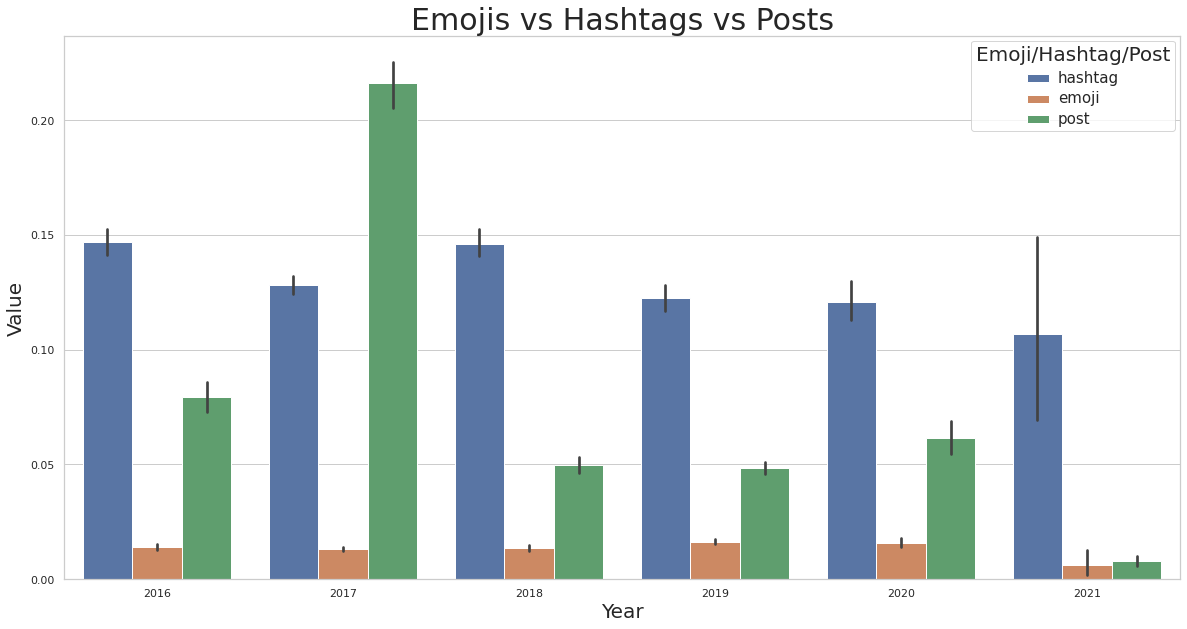

In [155]:
fig, ax = plt.subplots(1,figsize=(20,10))
sns.barplot(x='Year', y='Value', hue='Emoji/Hashtag/Post', data=data, ax =ax)
plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='20') # for legend title
ax.set_title("Emojis vs Hashtags vs Posts",fontsize = 30)
plt.savefig(OUTPUT / "Emojis vs Hashtags vs Posts.jpeg",quality =95,bbox_inches = 'tight')

In [160]:
gdf_plot = df[["Day/Month/Year", "emoji_norm","hashtag_norm","post_norm","lat","long"]].copy()
gdf = gp.GeoDataFrame(gdf_plot,
                      geometry = gp.points_from_xy(gdf_plot.long,gdf_plot.lat),
                      crs = "epsg:4326")


eu = gp.read_file(Path.cwd().parents[0] / "Europe_coastline_shapefile"/ "eu_shp_4326.shp")
eu.crs

In [166]:
data = gp.sjoin(gdf,eu, how ="left", op = "within")
data.drop(columns = ["index_right","long","lat","pop_est","continent", "iso_a3", "gdp_md_est"],inplace =True)
data.dropna(subset=["name"],inplace = True)
data